# HW2 Q1

In [16]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import cv2
import numpy as np
from keras.datasets import cifar10
from keras import backend as K
from keras.utils import np_utils

In [17]:
# load train and test dataset
def load_dataset(img_rows, img_cols):
    # Load cifar10 training and validation sets
    (trainX, trainY), (testX, testY) = cifar10.load_data()

    # Resize trainging images
    if K.image_data_format() == 'th':
        trainX = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in trainX])
        testX = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in testX])
    else:
        trainX = np.array([cv2.resize(img, (img_rows,img_cols)) for img in trainX])
        testX = np.array([cv2.resize(img, (img_rows,img_cols)) for img in testX])

    # Transform targets to keras compatible format
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)

    return trainX, trainY, testX, testY

In [27]:
def image_resizer(img_rows, img_cols, X):
        # Resize trainging images
    if K.image_data_format() == 'th':
        X = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in trainX])
    else:
        X = np.array([cv2.resize(img, (img_rows,img_cols)) for img in X])
    return X

In [18]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [19]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',f1_m, precision_m, recall_m])
	return model

In [20]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.show()
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.show()
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [21]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## TOTV

In [22]:
# load dataset
trainX, trainY, testX, testY = load_dataset(32, 32)
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# fit model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
782/782 [==============================] - 8s 9ms/step - loss: 2.0043 - accuracy: 0.2556 - f1_m: 0.0403 - precision_m: 0.3031 - recall_m: 0.0223 - val_loss: 1.7380 - val_accuracy: 0.3656 - val_f1_m: 0.0540 - val_precision_m: 0.6574 - val_recall_m: 0.0285
Epoch 2/100
782/782 [==============================] - 7s 8ms/step - loss: 1.6627 - accuracy: 0.3914 - f1_m: 0.1984 - precision_m: 0.6172 - recall_m: 0.1204 - val_loss: 1.4970 - val_accuracy: 0.4521 - val_f1_m: 0.2574 - val_precision_m: 0.7013 - val_recall_m: 0.1594
Epoch 3/100
782/782 [==============================] - 7s 8ms/step - loss: 1.5168 - accuracy: 0.4449 - f1_m: 0.3053 - precision_m: 0.6548 - recall_m: 0.2013 - val_loss: 1.3859 - val_accuracy: 0.4933 - val_f1_m: 0.3683 - val_precision_m: 0.7231 - val_recall_m: 0.2493
Epoch 4/100
782/782 [==============================] - 7s 8ms/step - loss: 1.4216 - accuracy: 0.4809 - f1_m: 0.3743 - precision_m: 0.6759 - recall_m: 0.2611 - val_loss: 1.3088 - val_accuracy: 0.5284 


LOSS: 0.605827808380127, ACCURACY: 0.8256000280380249, F1_SCORE: 0.8284942507743835, PRECISION: 0.8489955067634583, RECALL: 0.8096046447753906



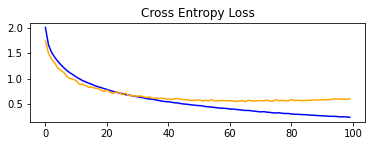

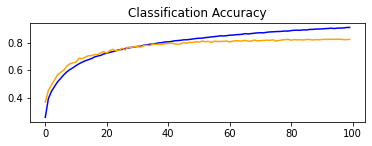

In [23]:
# evaluate the model
loss, acc, f1_score, precision, recall = model.evaluate(testX, testY, verbose=0)
print(f"\nLOSS: {loss}, ACCURACY: {acc}, F1_SCORE: {f1_score}, PRECISION: {precision}, RECALL: {recall}\n")

# learning curves
summarize_diagnostics(history)

In [28]:
trainX16, trainY16, testX16, testY16 = load_dataset(16, 16)
testX16 = image_resizer(32, 32, testX16)
trainX16, testX16 = prep_pixels(trainX16, testX16)
# evaluate the model
loss, acc, f1_score, precision, recall = model.evaluate(testX16, testY16, verbose=0)
print(f"\nLOSS: {loss}, ACCURACY: {acc}, F1_SCORE: {f1_score}, PRECISION: {precision}, RECALL: {recall}\n")


LOSS: 2.0250144004821777, ACCURACY: 0.4848000109195709, F1_SCORE: 0.48083916306495667, PRECISION: 0.5226601362228394, RECALL: 0.44648560881614685



In [29]:
trainX8, trainY8, testX8, testY8 = load_dataset(8, 8)
testX8 = image_resizer(32, 32, testX16)
trainX8, testX8 = prep_pixels(trainX8, testX8)
# evaluate the model
loss, acc, f1_score, precision, recall = model.evaluate(testX8, testY8, verbose=0)
print(f"\nLOSS: {loss}, ACCURACY: {acc}, F1_SCORE: {f1_score}, PRECISION: {precision}, RECALL: {recall}\n")


LOSS: 3.795569896697998, ACCURACY: 0.10000000149011612, F1_SCORE: 0.037637487053871155, PRECISION: 0.12782639265060425, RECALL: 0.02256389707326889



## TVTV

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



LOSS: 0.5750920176506042, ACCURACY: 0.8295000195503235, F1_SCORE: 0.8326408267021179, PRECISION: 0.8528531789779663, RECALL: 0.8139976263046265



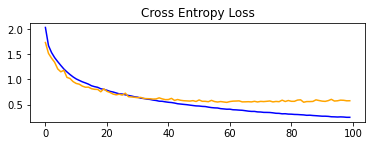

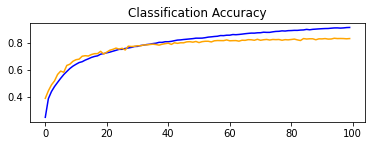

In [30]:
# load dataset
trainX, trainY, testX, testY = load_dataset(32, 32)
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# fit model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

# evaluate the model
loss, acc, f1_score, precision, recall = model.evaluate(testX, testY, verbose=0)
print(f"\nLOSS: {loss}, ACCURACY: {acc}, F1_SCORE: {f1_score}, PRECISION: {precision}, RECALL: {recall}\n")

# learning curves
summarize_diagnostics(history)


LOSS: 0.7148781418800354, ACCURACY: 0.7577999830245972, F1_SCORE: 0.7563764452934265, PRECISION: 0.8110974431037903, RECALL: 0.7101637125015259



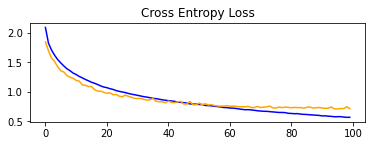

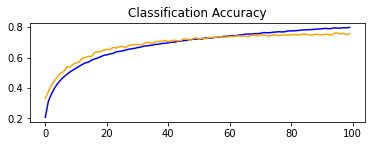

In [31]:
# load dataset
trainX, trainY, testX, testY = load_dataset(16, 16)
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# fit model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

# evaluate the model
loss, acc, f1_score, precision, recall = model.evaluate(testX, testY, verbose=0)
print(f"\nLOSS: {loss}, ACCURACY: {acc}, F1_SCORE: {f1_score}, PRECISION: {precision}, RECALL: {recall}\n")

# learning curves
summarize_diagnostics(history)


LOSS: 1.0892610549926758, ACCURACY: 0.6169000267982483, F1_SCORE: 0.5919186472892761, PRECISION: 0.7319719195365906, RECALL: 0.49980032444000244



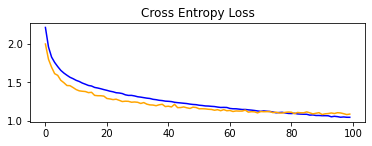

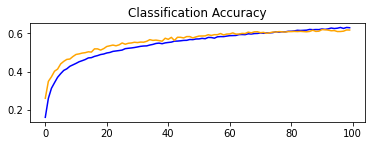

In [32]:
# load dataset
trainX, trainY, testX, testY = load_dataset(8, 8)
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# fit model
history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)

# evaluate the model
loss, acc, f1_score, precision, recall = model.evaluate(testX, testY, verbose=0)
print(f"\nLOSS: {loss}, ACCURACY: {acc}, F1_SCORE: {f1_score}, PRECISION: {precision}, RECALL: {recall}\n")

# learning curves
summarize_diagnostics(history)